# Marked Point Pattern

In addition to the [unmarked point pattern](pointpattern.ipynb), non-binary attributes might be associated with each point, leading to the so-called marked point pattern. The charactertistics of a marked point pattern are:

* Location pattern of the events are of interest
* Stochastic attribute attached to the events is of interest

Unmarked point pattern can be modified to be a marked point pattern using the method **add_marks** while the method **explode** could decompose a marked point pattern into a sequence of unmarked point patterns. Both methods belong to the class **PointPattern**.

In [1]:
from pointpats import PoissonPointProcess, PoissonClusterPointProcess, Window, poly_from_bbox, PointPattern
import libpysal as ps
from libpysal.cg import shapely_ext
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# open the virginia polygon shapefile
va = ps.io.open(ps.examples.get_path("virginia.shp"))
polys = [shp for shp in va]

In [3]:
# Create the exterior polygons for VA from the union of the county shapes
state = shapely_ext.cascaded_union(polys)
# create window from virginia state boundary
window = Window(state.parts)

In [4]:
window.bbox

[-83.67526245117188, 36.541481018066406, -75.24258422851562, 39.45690155029297]

In [5]:
window.centroid

(-78.85183583334933, 37.51851209850039)

In [6]:
samples = PoissonPointProcess(window, 200, 1, conditioning=False, asPP=False)

In [7]:
csr = PointPattern(samples.realizations[0])

In [8]:
cx, cy = window.centroid

In [9]:
cx

-78.85183583334933

In [10]:
cy

37.51851209850039

In [11]:
west = csr.points.x < cx
south = csr.points.y < cy
east = 1 - west
north = 1 - south

#### Create an attribute named quad which has a value for each event.

In [12]:
quad = 1 * east * north +  2 * west * north + 3 * west * south + 4 * east * south

In [13]:
type(quad)

pandas.core.series.Series

In [14]:
quad

0      2
1      3
2      3
3      4
4      1
5      3
6      1
7      4
8      2
9      3
10     4
11     4
12     3
13     1
14     1
15     1
16     4
17     1
18     1
19     3
20     4
21     3
22     1
23     3
24     1
25     1
26     4
27     1
28     3
29     3
      ..
170    2
171    2
172    3
173    3
174    1
175    4
176    3
177    3
178    4
179    1
180    1
181    3
182    3
183    1
184    2
185    3
186    1
187    2
188    4
189    1
190    4
191    1
192    3
193    3
194    4
195    3
196    1
197    1
198    4
199    4
Length: 200, dtype: int64

#### Attach the attribute quad to the point pattern 

In [15]:
csr.add_marks([quad], mark_names=['quad'])

In [16]:
csr.df

,x,y,quad
0,-79.603948,37.791190,2
1,-80.079205,37.396681,3
2,-79.464397,36.625981,3
3,-76.437205,36.884895,4
4,-78.545956,37.992603,1
5,-80.241928,36.991135,3
6,-77.898430,37.716846,1
7,-76.498353,37.321863,4
8,-79.900184,37.854658,2
9,-81.102672,36.633735,3


#### Explode a marked point pattern into a sequence of individual point patterns. Since the mark quad has 4 unique values, the sequence will be of length 4.

In [17]:
csr_q = csr.explode('quad')

In [18]:
len(csr_q)

4

In [19]:
csr

In [20]:
csr.summary()

Point Pattern
200 points
Bounding rectangle [(-83.5775552379073,36.58477411642467), (-75.55088173741038,39.23835955804836)]
Area of window: 21.299463945585302
Intensity estimate for window: 9.389907676125041
           x          y  quad
0 -79.603948  37.791190     2
1 -80.079205  37.396681     3
2 -79.464397  36.625981     3
3 -76.437205  36.884895     4
4 -78.545956  37.992603     1


#### Plot the 4 individual sequences

In [21]:
plt.xlim?

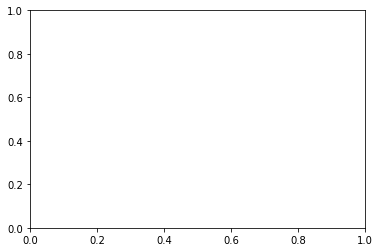

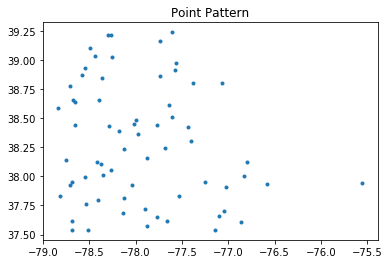

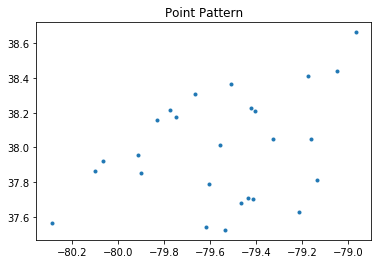

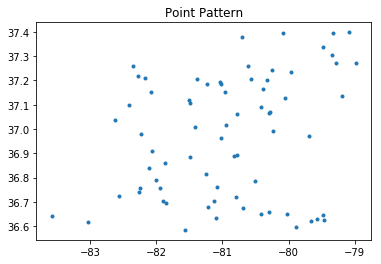

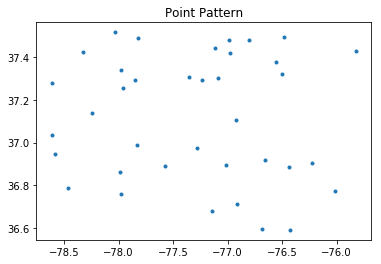

In [22]:
plt.xlim()
for ppn in csr_q:
    ppn.plot()

#### Plot the 4 unmarked point patterns using the same axes for a convenient comparison of locations

In [23]:
x0, y0, x1, y1 = csr.mbb
ylim = (y0, y1)
xlim = (x0, x1)

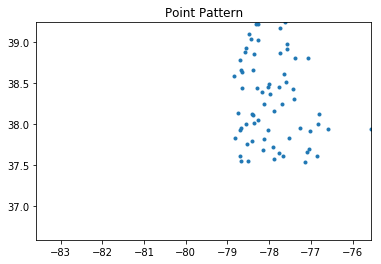

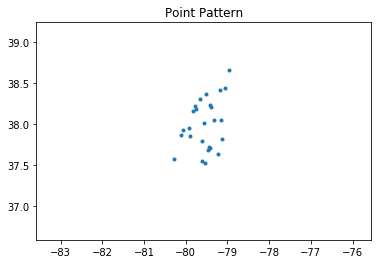

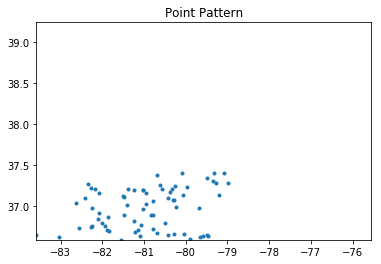

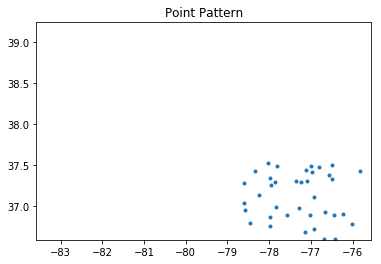

In [24]:
for ppn in csr_q:
    ppn.plot()
    plt.xlim(xlim)
    plt.ylim(ylim)